In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

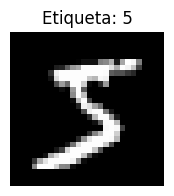

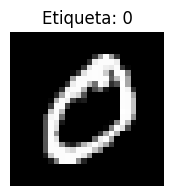

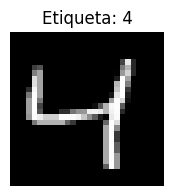

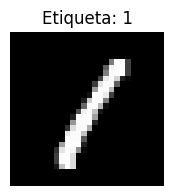

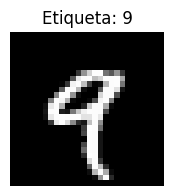

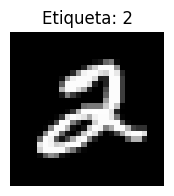

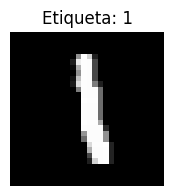

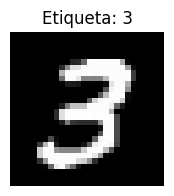

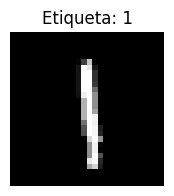

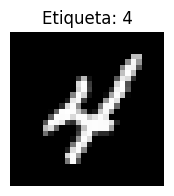

In [3]:
# Paso 1: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Paso 2: Visualizar las primeras X imágenes del conjunto de entrenamiento
for i in range(10):
    plt.figure(figsize=(2, 2))  # Tamaño de la figura
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f"Etiqueta: {y_train[i]}")  # Título con la etiqueta de la imagen
    plt.axis('off')  # Ocultar ejes
    plt.show()

In [4]:
# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Paso 4: Definir el modelo MLP
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

d:\Bootcamp IA\Nivel intermedio\Ejercicio MNIST\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8608 - loss: 0.4794 - val_accuracy: 0.9567 - val_loss: 0.1374
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0991 - val_accuracy: 0.9689 - val_loss: 0.1024
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.9726 - val_loss: 0.0913
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9746 - val_loss: 0.0863
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9734 - val_loss: 0.0924
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9737 - val_loss: 0.1013
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9750 - val_loss: 0.0967
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9941 - loss: 0.0172 - val_accuracy: 0.

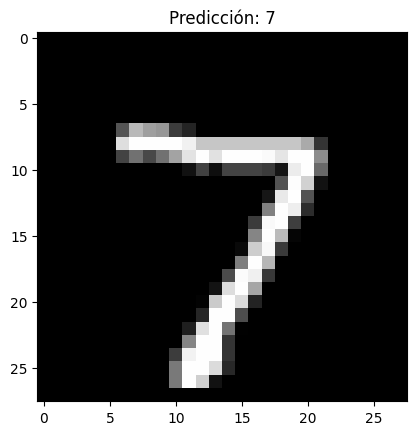

In [8]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Paso 6: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción para la imagen personalizada: 1


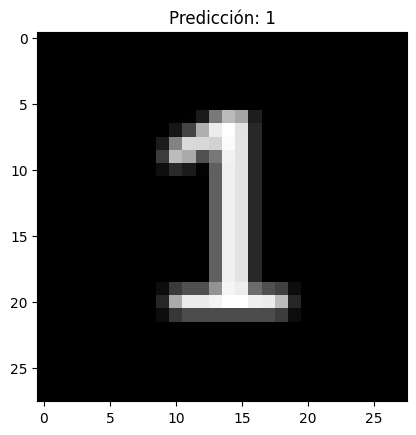

In [9]:
# Paso 9: Probar el modelo con una imagen personalizada
#ruta_imagen="D:/talento tech/ia/imagen1.png"
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('./Example4.png')

In [10]:
model.save("mlp_model.h5")

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [108]:
# Definir un generador de imágenes con transformaciones de data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,         # Rotación aleatoria hasta 10 grados
    width_shift_range=0.1,     # Desplazamiento horizontal
    height_shift_range=0.1,    # Desplazamiento vertical
    zoom_range=0.1,            # Zoom aleatorio
    shear_range=0.1            # Cizallamiento
)

In [109]:
# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [110]:
# Asegúrate de que los datos de entrada estén en el formato correcto
x_train = x_train.reshape(-1, 28, 28, 1)  # Reformat para que el generador de imágenes funcione
x_test = x_test.reshape(-1, 28, 28, 1)

In [111]:
# Asegurarse de que las etiquetas estén en el formato correcto (one-hot encoding) solo una vez
y_train = to_categorical(y_train, 10)  # Aquí debes tener etiquetas con shape (None, 10)
y_test = to_categorical(y_test, 10)

In [112]:
# Dividir los datos en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [113]:
# Crear el modelo CNN
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\Bootcamp IA\Nivel intermedio\Ejercicio MNIST\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
# Compilar el modelo
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Crear generadores de imágenes para los conjuntos de entrenamiento
train_generator = datagen.flow(x_train, y_train, batch_size=128)

# Entrenar el modelo sin validation_split, especificando explícitamente el conjunto de validación
history = model2.fit(train_generator,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10


d:\Bootcamp IA\Nivel intermedio\Ejercicio MNIST\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5706 - loss: 3.4266 - val_accuracy: 0.9536 - val_loss: 0.1566
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9352 - loss: 0.2111 - val_accuracy: 0.9744 - val_loss: 0.0886
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9565 - loss: 0.1374 - val_accuracy: 0.9783 - val_loss: 0.0722
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9668 - loss: 0.1110 - val_accuracy: 0.9820 - val_loss: 0.0583
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9710 - loss: 0.0946 - val_accuracy: 0.9843 - val_loss: 0.0531
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9742 - loss: 0.0876 - val_accuracy: 0.9822 - val_loss: 0.0611
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9780 - loss: 0.0741 - val_accuracy: 0.9850 - val_loss: 0.0510
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9793 - loss: 0.0653 - val_accurac

In [117]:
# Función para predecir la imagen personalizada
def predecir_imagen_personalizada2(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255  # Normalizar y ajustar forma
    prediccion = model2.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    # Mostrar la imagen con la predicción
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicción para la imagen personalizada: 7


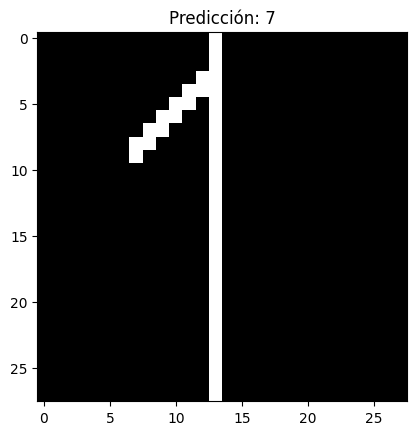

In [119]:
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada2('./Example3.png')